## Importing the libraries
---

In [1]:
# importing the library
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

# for confusion matrix
from sklearn import metrics

# setting the matplotlib backend to 'inline' for Jupyter Notebooks
%matplotlib inline

## Importing the dataset
---

In [2]:
# Import the data set
df_def = pd.read_csv(r"C:\Users\bahad\Desktop\Courses\Data Analysis\social_ads.csv")
df_def.head() # checking the first 5 rows

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Dimension of the dataset
---

In [3]:
#Size of the dataset
df_def.shape

(400, 3)

## Details of the Columns 
---

In [4]:
#Information of the dataset 
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Checking the total count of NULLs
---

In [5]:
# Checking for null values
df_def.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Checking the Duplicated datas
---

In [6]:
# Checkimg for duplicated data
df_def.duplicated().sum()

33

## Distribution metrics of the dataset
---

In [7]:
# Checking the basic data distribution of each column
df_def.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


## Scatter Plot of the dataset columns
---

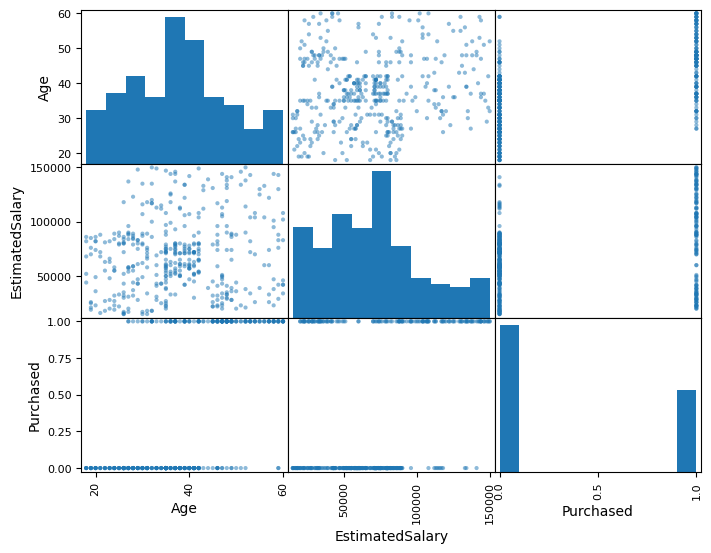

In [8]:
# Scatter matrix
pd.plotting.scatter_matrix(df_def,figsize=(8,6));

As per the scatter plot, Age and Estimated Salary are not correlated. Also the Purchased column is a having only 2 values : 0 and 1

## Boxplots (1. Estimated Salary vs Purchased, 2. Age vs Purchased)
---

Text(0, 0.5, 'Age')

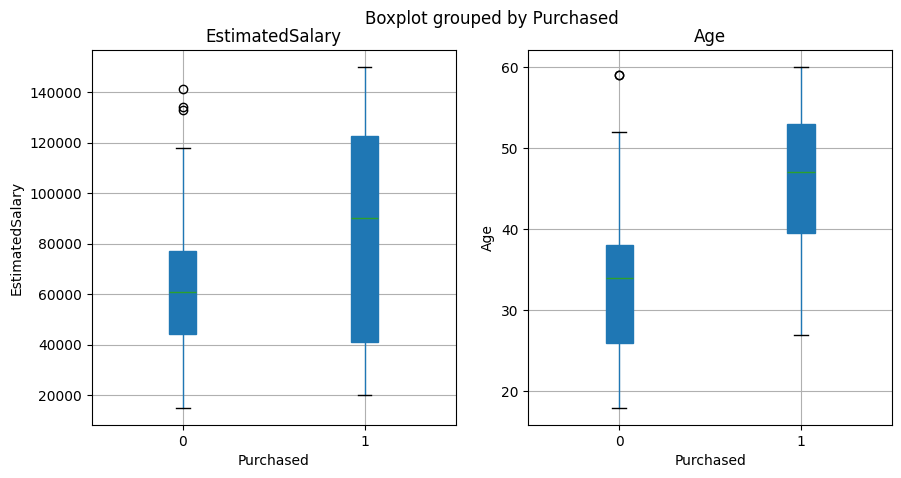

In [9]:
# Boxpolot of EstimatedSalary and Age, grouped by Purchased
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1)
df_def.boxplot(column='EstimatedSalary', by='Purchased', ax=ax1, patch_artist=True)
ax1.set_ylabel('EstimatedSalary')

ax2 = fig.add_subplot(1, 2, 2)
df_def.boxplot(column='Age', by='Purchased', ax=ax2, patch_artist=True)
ax2.set_ylabel('Age')

We see there is not much of the outlier

## Plotting : Purchased vs (EstimatedSalary and Age)
---

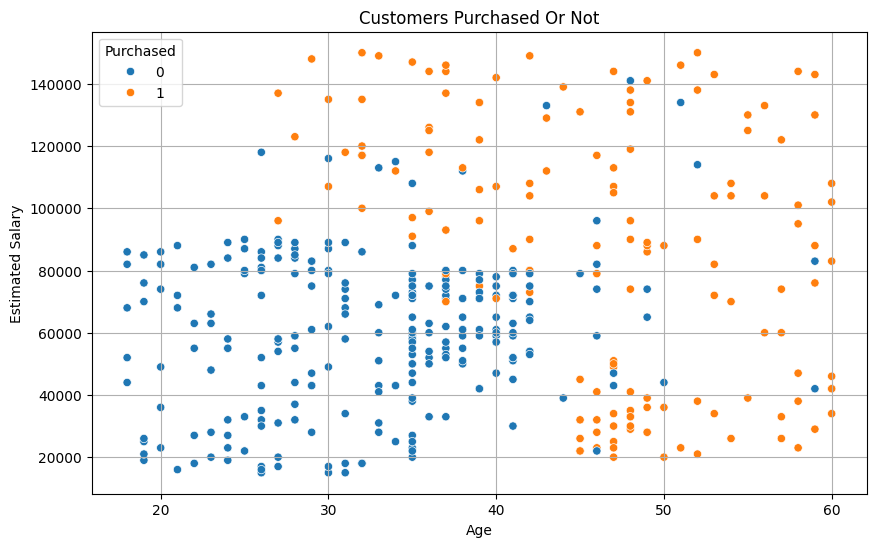

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()

# Use seaborn to easily make scatter plot grouped by default (hue parameter)
sn.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df_def) 
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_title('Customers Purchased Or Not')
ax.grid()

## Sampling the dataset into Training sets and Test sets
---

In [11]:
# Dividing data in train and test dataset
train_df, test_df = train_test_split(df_def, test_size=0.2, random_state=42)

## Dimension of the Training dataset
---

In [12]:
# Size of train dataset
train_df.shape

(320, 3)

## Dimension of the Test dataset
---

In [13]:
# Size of test dataset
test_df.shape

(80, 3)

## Applying the 'Logistic Regression' to model the classification problem
---

### Train the Model
---

In [14]:
# Logistic regression: function smf.logit(...)
logres1 = smf.logit('Purchased ~ EstimatedSalary', data=train_df).fit()
#logres1.summary()

Optimization terminated successfully.
         Current function value: 0.578480
         Iterations 5


### Prediction on the test data
---

In [15]:
# Model : Logistic Regression
#Use function predict() to predict probability of Purchased
ppred_test = logres1.predict(test_df)

# Crterion:
# - if P(Purchased|EstimatedSalary) >  threshold --> predict Purchased
# - if P(Purchased|EstimatedSalary) >= threshold --> predict no-Purchased
threshold = 0.5
ypred = (ppred_test > threshold).astype(int)

### Plotting the Logistic Regression on test data
---

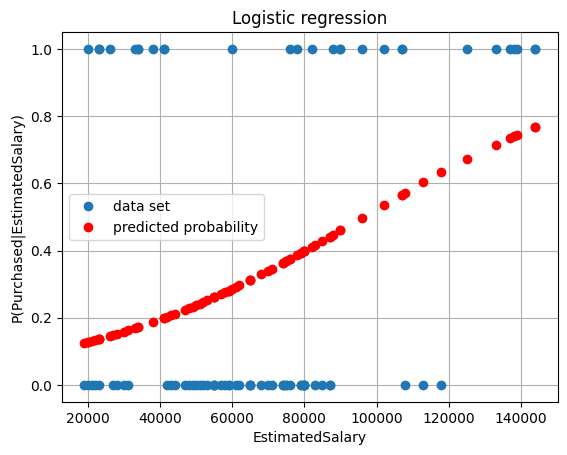

In [16]:
# Data set
x2 = test_df['EstimatedSalary']
y2 = test_df['Purchased']

fig = plt.figure()
ax = fig.add_subplot()

# Plot data set
ax.plot(x2,y2,'o', label='data set')

# Plot predicted probability
ax.plot(x2,ppred_test,'ro', label='predicted probability')
ax.set_xlabel('EstimatedSalary')
ax.set_ylabel('P(Purchased|EstimatedSalary)')
ax.set_title('Logistic regression')
ax.grid()
ax.legend()

### Confusion Matrix of the Logistic Regression (as per the threshold : 0.5)
---

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Confusion Matrix
cm = confusion_matrix(ypred,test_df['Purchased'])
cm

array([[49, 18],
       [ 3, 10]], dtype=int64)

### Metrics of the Classification
---

In [18]:
# Classification Matrix
cr = classification_report(ypred,test_df['Purchased'])
print(cr)

# Accuracy of the model
accuracy = accuracy_score(ypred,test_df['Purchased'])
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        67
           1       0.36      0.77      0.49        13

    accuracy                           0.74        80
   macro avg       0.65      0.75      0.66        80
weighted avg       0.85      0.74      0.77        80

Accuracy: 0.74


## Applying the 'Mulitple Logistic Regression' to model the classification problem
---

### Train the model
---

In [19]:
# Multiple logistic regression: function smf.logit(...).fit()
logres2 = smf.logit('Purchased ~ EstimatedSalary + Age', data=train_df).fit()
#logres2.summary()

Optimization terminated successfully.
         Current function value: 0.372821
         Iterations 7


### Prediction on the test data
---

In [20]:

multi_ppred_test = logres2.predict(test_df)

# Crterion:
# - if P(Purchased|EstimatedSalary) >  threshold --> predict Purchased
# - if P(Purchased|EstimatedSalary) >= threshold --> predict no-Purchased
threshold = 0.5
multi_ypred = (multi_ppred_test > threshold).astype(int)

### Confusion matrix of the model
---

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Confusion Matrix
cm_ml = confusion_matrix(multi_ypred,test_df['Purchased'])
cm_ml

array([[50,  7],
       [ 2, 21]], dtype=int64)

### Metrics of this Classification Problem using Multiple Logistic Regression
---

In [22]:
# Classification Matrix
cr_ml = classification_report(multi_ypred,test_df['Purchased'])
print(cr_ml)

# Accuracy of the model
accuracy = accuracy_score(multi_ypred,test_df['Purchased'])
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        57
           1       0.75      0.91      0.82        23

    accuracy                           0.89        80
   macro avg       0.86      0.90      0.87        80
weighted avg       0.90      0.89      0.89        80

Accuracy: 0.89


### We see the accuracy score improve from 0.74 (Logistic Regression) to 0.89 (Multiple Logistic Regression) 
---

## ROC Curve for the Logistic Regression
---

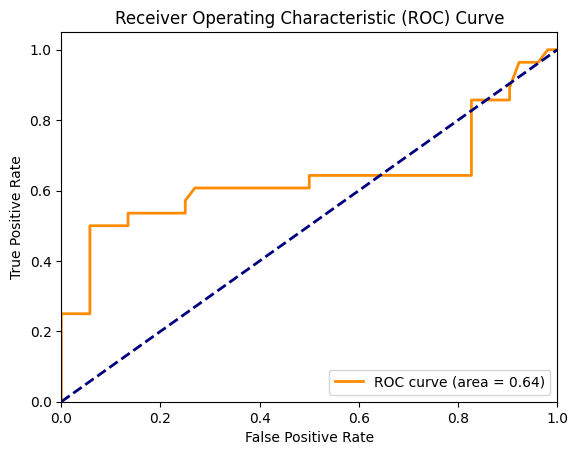

In [23]:
# Plot ROC curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y2, ppred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ROC Curve for the Multiple Logistic Regression
---

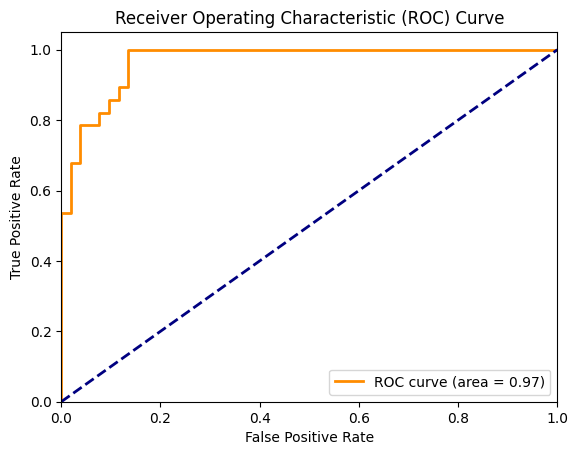

In [24]:
# Plot ROC curve for Multiple Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y2, multi_ppred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As per the ROC curve we can select the exact threshold which would be very much decided by the domain expert.